# Proyecto parte 1

## Introducción 

## Elección de activos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import random
from sklearn.linear_model import LinearRegression

In [3]:
# Get tickers 
tickers = ['TSLA','AAPL','GOOGL','XOM','SHEL','CVX','PEP','CALM','TSN','PFE','CVS','UNH','TQQQ','VOO','SQQQ', 'VTI']
start_date = '2015-01-01'
end_date = "2023-01-01"

# Descargar precios y graficar
St = yf.download(tickers, start=start_date, end = end_date)['Close']
St.head()
rt = St.pct_change().dropna()
rt

[*********************100%***********************]  16 of 16 completed


,AAPL,CALM,CVS,CVX,GOOGL,PEP,PFE,SHEL,SQQQ,TQQQ,TSLA,TSN,UNH,VOO,VTI,XOM
Date,,,,,,,,,,,,,,,,
2015-01-05 00:00:00-05:00,-0.028172,-0.022251,-0.009884,-0.039972,-0.019054,-0.007518,-0.005426,-0.047477,0.049284,-0.045008,-0.042041,-0.023029,-0.016471,-0.017569,-0.017183,-0.027362
2015-01-06 00:00:00-05:00,0.000094,-0.035724,0.000743,-0.000463,-0.024679,-0.007575,0.008344,-0.012226,0.036814,-0.039653,0.005664,0.005893,-0.002018,-0.009833,-0.009798,-0.005316
2015-01-07 00:00:00-05:00,0.014022,0.022777,0.018041,-0.000833,-0.002941,0.029241,0.013686,0.011584,-0.037037,0.038470,-0.001562,0.012226,0.010210,0.012495,0.011932,0.010133
2015-01-08 00:00:00-05:00,0.038422,0.023075,0.021266,0.022883,0.003484,0.018174,0.020408,0.020235,-0.058487,0.057034,-0.001564,0.036739,0.047733,0.017568,0.017640,0.016645
2015-01-09 00:00:00-05:00,0.001073,-0.011540,-0.000510,-0.019926,-0.012211,-0.006771,0.004615,-0.012608,0.019581,-0.020247,-0.018802,-0.020631,-0.009360,-0.008421,-0.008290,-0.001410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23 00:00:00-05:00,-0.002798,0.024572,0.001713,0.030916,0.016750,0.006461,0.003679,0.018329,-0.004651,0.002851,-0.017551,0.007720,0.008006,0.005601,0.005516,0.026445
2022-12-27 00:00:00-05:00,-0.013878,-0.013152,-0.005772,0.012571,-0.020621,0.004444,-0.013506,0.001558,0.043178,-0.042638,-0.114089,0.005542,0.001280,-0.003979,-0.004179,0.013894
2022-12-28 00:00:00-05:00,-0.030685,-0.024929,-0.002795,-0.014753,-0.015677,-0.007210,-0.006454,-0.022637,0.040495,-0.040380,0.033089,-0.008105,-0.006654,-0.012269,-0.012590,-0.016426


###  - Normalizar

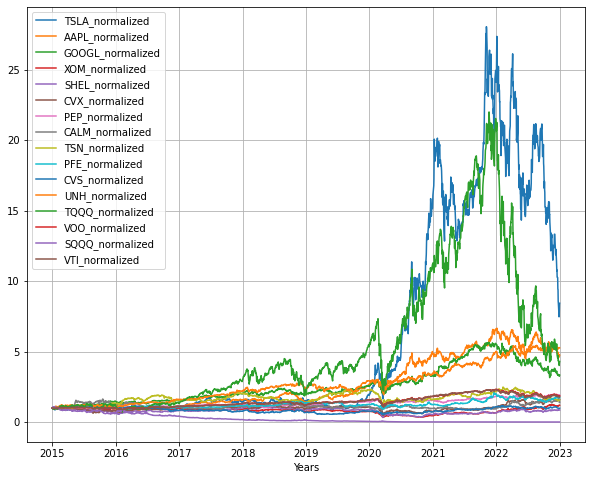

In [10]:
# Normalizamos todos los activos 
normalized = St.copy()
for i in tickers:
    normalized[i+'_normalized'] = St[i]/St[i].iloc[0]

# Veamos la normalización 
normalized = normalized[['TSLA_normalized','AAPL_normalized','GOOGL_normalized',
            'XOM_normalized','SHEL_normalized','CVX_normalized',
            'PEP_normalized','CALM_normalized','TSN_normalized',
            'PFE_normalized','CVS_normalized','UNH_normalized',
            'TQQQ_normalized','VOO_normalized','SQQQ_normalized', 'VTI_normalized']]
#Graficamos
plt.figure(figsize=(10,8))
plt.plot(normalized)
plt.xlabel('Years')
plt.legend(normalized)
plt.grid()       
plt.show()

In [26]:
normalized

,TSLA_normalized,AAPL_normalized,GOOGL_normalized,XOM_normalized,SHEL_normalized,CVX_normalized,PEP_normalized,CALM_normalized,TSN_normalized,PFE_normalized,CVS_normalized,UNH_normalized,TQQQ_normalized,VOO_normalized,SQQQ_normalized,VTI_normalized
Date,,,,,,,,,,,,,,,,
2015-01-02 00:00:00-05:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2015-01-05 00:00:00-05:00,0.957959,0.971828,0.980946,0.972638,0.952523,0.960028,0.992482,0.977749,0.976971,0.994574,0.990116,0.983529,0.954992,0.982431,1.049284,0.982817
2015-01-06 00:00:00-05:00,0.963385,0.971920,0.956737,0.967467,0.940878,0.959584,0.984964,0.942820,0.982728,1.002873,0.990852,0.981544,0.917124,0.972771,1.087912,0.973187
2015-01-07 00:00:00-05:00,0.961880,0.985548,0.953923,0.977270,0.951777,0.958785,1.013765,0.964295,0.994743,1.016598,1.008728,0.991566,0.952406,0.984926,1.047619,0.984800
2015-01-08 00:00:00-05:00,0.960376,1.023415,0.957247,0.993537,0.971036,0.980725,1.032190,0.986546,1.031289,1.037344,1.030179,1.038897,1.006725,1.002229,0.986347,1.002171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23 00:00:00-05:00,8.423008,4.824293,3.370031,1.170742,0.862646,1.575768,1.929902,1.672186,1.535670,1.743659,0.983807,5.271979,4.367926,1.867675,0.004454,1.807213
2022-12-27 00:00:00-05:00,7.462040,4.757340,3.300538,1.187009,0.863989,1.595576,1.938479,1.650194,1.544180,1.720109,0.978128,5.278726,4.181687,1.860244,0.004646,1.799660
2022-12-28 00:00:00-05:00,7.708950,4.611360,3.248796,1.167510,0.844431,1.572038,1.924502,1.609056,1.531665,1.709007,0.975394,5.243600,4.012830,1.837421,0.004834,1.777002


## Market Beta, R2, Promedio Acción

In [11]:
import warnings
warnings.filterwarnings('ignore')

betas = {}
for i in tickers : 
    if i != 'VTI' :
        flag_df = rt[[i, 'VTI']]
        y = flag_df[[i]]
        X = flag_df[['VTI']]
        
        # Calculo de beta
        model = LinearRegression()
        model.fit(X, y)
        beta = model.coef_[0][0]
    
        # Calculo de r2
        predictions = model.predict(X)
        promedio = np.mean(y)
    
        var_predictions = np.var(y - predictions)
        var_promedio = np.var(y - promedio)
        r2 = (var_promedio - var_predictions) / var_promedio
    
        # Promedio acción
        promedio_accion = np.mean(y)
    
        # Agregamos todo al jason de betas y anualizamos
        betas[i] = [beta, r2[0], promedio_accion[0] * 252]

betas

{'TSLA': [1.433028763670766, 0.2308043352685516, 0.4274285593544006],
 'AAPL': [1.1802831053364824, 0.5610609720602843, 0.24012311448110746],
 'GOOGL': [1.105170971785861, 0.5519584755391587, 0.19059200681311347],
 'XOM': [0.9078431716319064, 0.35115223381457406, 0.06400781972192263],
 'SHEL': [0.9791241916571084, 0.3142360066131505, 0.03524910660891886],
 'CVX': [1.042536060703223, 0.3990057935085221, 0.10798069007197839],
 'PEP': [0.6435274258875607, 0.399952703384598, 0.09997748357835194],
 'CALM': [0.4301057903671954, 0.06320335253158454, 0.09595855677250432],
 'TSN': [0.6403875095173552, 0.17418684101276394, 0.09803237248692291],
 'PFE': [0.6162710659448299, 0.25211673659689426, 0.09532219066101781],
 'CVS': [0.7231995044843316, 0.27212960162643307, 0.03241243811677921],
 'UNH': [0.8914485816738765, 0.4078099095045502, 0.24320027620403611],
 'TQQQ': [3.2614167758284793, 0.8558085064888079, 0.411317744421244],
 'VOO': [0.9835663044149949, 0.987458678122428, 0.0958164407613306],
 'S

In [12]:
i = 'VTI'
y = flag_df[[i]]
X = flag_df[['VTI']]
model = LinearRegression()
model.fit(X,y)
model.coef_[0][0]

1.0

In [13]:
df = pd.DataFrame()
df['betas'] = [betas[i][0] for i in betas]
df['r2'] = [betas[i][1] for i in betas]
df['rendimiento'] = [betas[i][2] for i in betas]
df['accion'] = [i for i in betas]
df

,betas,r2,rendimiento,accion
0,1.433029,0.230804,0.427429,TSLA
1,1.180283,0.561061,0.240123,AAPL
2,1.105171,0.551958,0.190592,GOOGL
3,0.907843,0.351152,0.064008,XOM
4,0.979124,0.314236,0.035249,SHEL
5,1.042536,0.399006,0.107981,CVX
6,0.643527,0.399953,0.099977,PEP
7,0.430106,0.063203,0.095959,CALM
8,0.640388,0.174187,0.098032,TSN
9,0.616271,0.252117,0.095322,PFE


## - BootStrap R2 y Beta (TSLA)

In [6]:
## Bootstrap beta y R2

from sklearn.metrics import r2_score

n = 1000
results = pd.DataFrame(columns=['ticker', 'beta', 'r2'])

for i in tickers:
    if i != 'VTI':  # Agregar una condición para omitir el ticker 'VTI'
        betas = []
        r2s = []
        for j in range(n):
            bootstrap_df = rt.sample(len(rt), replace=True)
            X = bootstrap_df[['VTI']]
            y = bootstrap_df[[i]]
            model = LinearRegression().fit(X, y)
            beta = model.coef_[0][0]
            predictions = model.predict(X)
            r2 = r2_score(y_true=y, y_pred=predictions)
            betas.append(beta)
            r2s.append(r2)
        results = results.append({'ticker': i, 'beta': betas, 'r2': r2s}, ignore_index=True)

C:\Users\Daniel\AppData\Local\Temp\ipykernel_21092\3077654578.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'ticker': i, 'beta': betas, 'r2': r2s}, ignore_index=True)


KeyboardInterrupt: 

In [25]:
df = pd.DataFrame()
df['r2'] = r2
df['betas'] = betas
df

,r2,betas
0,0.300724,1.540652
1,0.222647,1.383170
2,0.246823,1.336621
3,0.194667,1.385952
4,0.246735,1.523892
...,...,...
4995,0.250841,1.532341
4996,0.259858,1.540500
4997,0.231858,1.451655
4998,0.209171,1.379633


## Bootstrap Beta y R2 (para todos los activos)

In [7]:
from sklearn.metrics import r2_score

In [10]:
## Bootstrap de beta y R2 para todos los activos

n = 1000
results2 = pd.DataFrame(columns=['beta_' + i for i in tickers if i != 'VTI'] + ['r2_' + i for i in tickers if i != 'VTI'])

for i in tickers:
    if i != 'VTI':
        betas = []
        r2s = []
        for j in range(n):
            bootstrap_df = rt.sample(len(rt), replace=True)
            X = bootstrap_df[['VTI']]
            y = bootstrap_df[[i]]
            model = LinearRegression().fit(X, y)
            beta = model.coef_[0][0]
            predictions = model.predict(X)
            r2 = r2_score(y_true=y, y_pred=predictions)
            betas.append(beta)
            r2s.append(r2)
        results2['beta_' + i] = betas
        results2['r2_' + i] = r2s
        

In [11]:
results2

,beta_TSLA,beta_AAPL,beta_GOOGL,beta_XOM,beta_SHEL,beta_CVX,beta_PEP,beta_CALM,beta_TSN,beta_PFE,...,r2_CVX,r2_PEP,r2_CALM,r2_TSN,r2_PFE,r2_CVS,r2_UNH,r2_TQQQ,r2_VOO,r2_SQQQ
0,1.452786,1.141116,1.069390,0.958170,0.895986,1.031388,0.614670,0.397557,0.681355,0.640211,...,0.429462,0.414272,0.051519,0.177077,0.284637,0.261877,0.356904,0.857020,0.988785,0.860776
1,1.380364,1.172841,1.095381,0.935641,0.964389,1.068895,0.671203,0.511461,0.522512,0.595743,...,0.390931,0.458485,0.093217,0.119616,0.224575,0.262233,0.343569,0.852303,0.988484,0.859455
2,1.440267,1.184377,1.116819,0.903042,1.087732,0.942241,0.659381,0.454699,0.590319,0.649785,...,0.322542,0.407238,0.068761,0.133631,0.290168,0.334643,0.363706,0.878176,0.987585,0.863052
3,1.365372,1.185194,1.142323,0.941329,0.995035,1.003724,0.575028,0.301414,0.716041,0.650674,...,0.397550,0.348999,0.030995,0.248693,0.283827,0.321351,0.426580,0.864239,0.986503,0.877190
4,1.527375,1.187802,1.173881,0.898255,0.978655,1.034969,0.615987,0.394675,0.618961,0.620613,...,0.410851,0.387725,0.058678,0.159618,0.253489,0.315616,0.448653,0.864007,0.985287,0.864827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.376447,1.196063,1.121859,0.894300,1.000528,1.131986,0.725920,0.371973,0.635725,0.649781,...,0.428392,0.452589,0.048276,0.158776,0.276380,0.209725,0.418015,0.836473,0.989922,0.861227
996,1.481799,1.186211,1.106702,0.874895,0.894380,0.972689,0.681678,0.394429,0.686173,0.629347,...,0.368483,0.488530,0.043503,0.205419,0.261956,0.298127,0.422648,0.867169,0.989689,0.855407
997,1.389121,1.177170,1.126043,0.968747,1.011382,1.112289,0.595956,0.483724,0.592212,0.640668,...,0.421236,0.352026,0.065060,0.176939,0.270811,0.287139,0.364989,0.877862,0.987982,0.831957
998,1.341316,1.210031,1.156073,0.973247,0.814211,1.051677,0.664410,0.416587,0.654044,0.613419,...,0.409694,0.449808,0.053426,0.168314,0.230979,0.246498,0.386432,0.864870,0.988030,0.860987


### - Analisis de la acción

[1.433028763670766,
 1.1802831053364824,
 1.105170971785861,
 0.9078431716319064,
 0.9791241916571084,
 1.042536060703223,
 0.6435274258875607,
 0.4301057903671954,
 0.6403875095173552,
 0.6162710659448299,
 0.7231995044843316,
 0.8914485816738765,
 3.2614167758284793,
 0.9835663044149949,
 -3.2685942300376456]